In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

print("""This loads the MNIST dataset, a collection of handwritten digits (0-9) with 60,000 training samples and 10,000 testing samples.""")
print("""
x_train: Training images, shape (60000, 28, 28) (28x28 grayscale images).
y_train: Training labels, shape (60000,).
x_test: Test images, shape (10000, 28, 28).
y_test: Test labels, shape (10000,).
""")
print("""
Pixel values in x_train and x_test are scaled from the range [0, 255] to [0, 1] by dividing by 255.0.
This normalization helps the model converge faster during training.
""")

This loads the MNIST dataset, a collection of handwritten digits (0-9) with 60,000 training samples and 10,000 testing samples.

x_train: Training images, shape (60000, 28, 28) (28x28 grayscale images).
y_train: Training labels, shape (60000,).
x_test: Test images, shape (10000, 28, 28).
y_test: Test labels, shape (10000,).


Pixel values in x_train and x_test are scaled from the range [0, 255] to [0, 1] by dividing by 255.0.
This normalization helps the model converge faster during training.



In [3]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
print(mnist)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

<module 'keras.api.datasets.mnist' from 'C:\\Users\\vikra\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


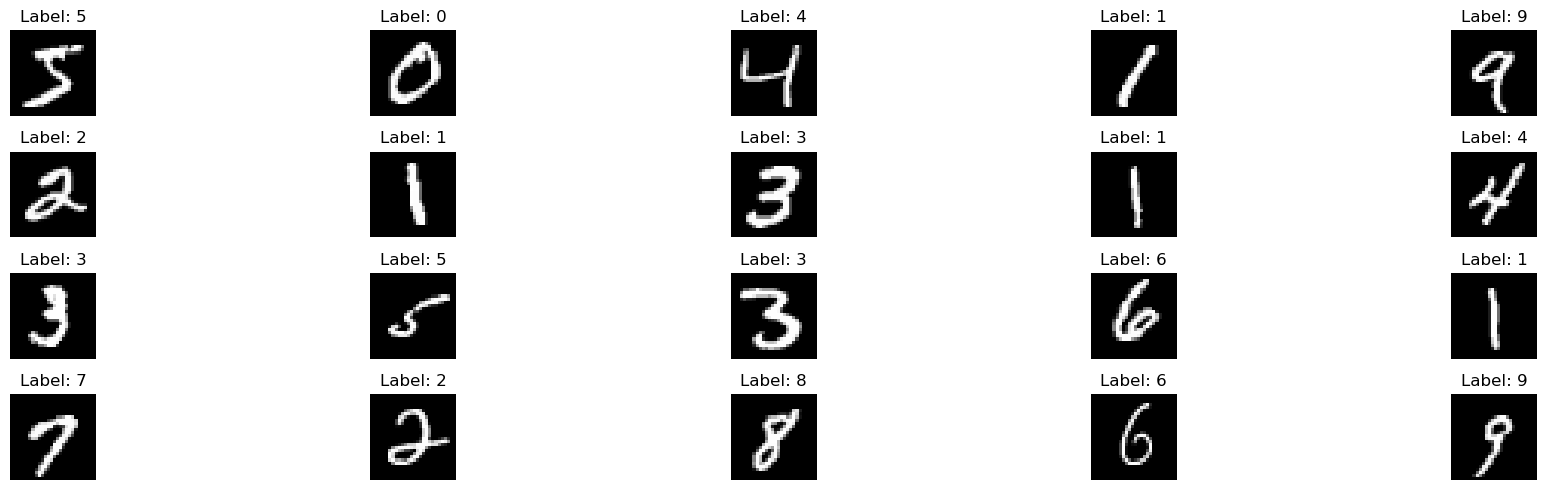

In [17]:
import matplotlib.pyplot as plt
# Plot a few images from the training dataset
plt.figure(figsize=(20, 5))  # Set figure size
for i in range(20):  # Display the first 10 images
    plt.subplot(4, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Display the corresponding label
    plt.axis('off')  # Remove axes for cleaner visualization
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

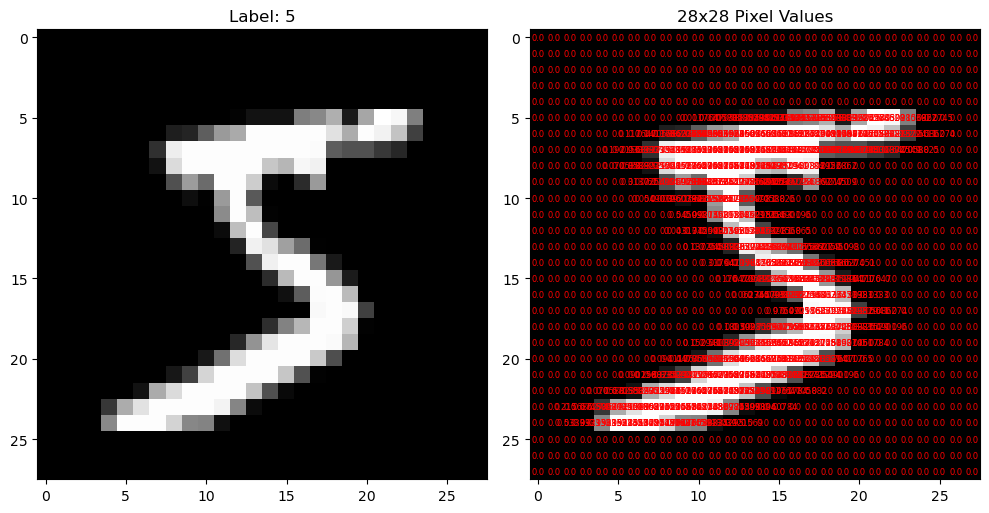

In [39]:
image = x_train[0]
label = y_train[0]
plt.figure(figsize=(10, 5))
# Show the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('on')  # Hide the axes

# Show the 28x28 pixel values
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')  # Display pixel grid
for i in range(28):  # Loop through rows
    for j in range(28):  # Loop through columns
        plt.text(j, i, str(image[i, j]), fontsize=6, 
                 color='red', ha='center', va='center')  # Add pixel value
plt.title("28x28 Pixel Values")
plt.axis('on')  # Hide the axes

plt.tight_layout()
plt.show()

In [41]:
from tensorflow.keras.layers import Input, Flatten, Dense
# Build the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),        
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [43]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
#default batch size batch_size=32
model.fit(x_train, y_train, epochs=5,batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.5212 - sparse_categorical_accuracy: 0.8552
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1486 - sparse_categorical_accuracy: 0.9575
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9721
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0702 - sparse_categorical_accuracy: 0.9789
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0.9848


In [45]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9712

Test accuracy: 0.9753000140190125


In [47]:
# Print weights of each layer, if available
for layer in model.layers:
    print(f"Layer: {layer.name}")
    
    # Get the weights for the layer
    weights = layer.get_weights()  
    
    if weights:  # Check if the layer has weights (some layers like Flatten, Dropout don't)
        print(f"Weights: {weights[0]}")  # Weights (if present)
        if len(weights) > 1:
            print(f"Biases: {weights[1]}")  # Biases (if present)
    else:
        print("No weights for this layer.")
    
    print("-" * 50)


Layer: flatten_1
No weights for this layer.
--------------------------------------------------
Layer: dense_2
Weights: [[ 0.02712065 -0.02943835 -0.06563411 ...  0.02958626 -0.00600408
  -0.01919326]
 [-0.04386369  0.0773095  -0.02328968 ... -0.06653176 -0.0144676
  -0.01664883]
 [-0.0488272  -0.03857385  0.01182523 ... -0.02056114 -0.03545871
  -0.01416192]
 ...
 [-0.08019933  0.0613772  -0.05031539 ...  0.03655213  0.02962461
   0.07932939]
 [-0.05808682  0.02589143  0.04388261 ... -0.01228293  0.02690269
  -0.06491442]
 [ 0.04730024 -0.04877382 -0.03438924 ... -0.0287092   0.01594479
  -0.06342535]]
Biases: [ 0.09921429 -0.01529401  0.10191719  0.11952773  0.06145305  0.00743415
 -0.05919448 -0.09999679 -0.06471559  0.04267189 -0.05210174  0.09450269
 -0.0625917   0.15967649  0.07466198 -0.08846652 -0.07727056  0.0052301
 -0.11609759 -0.0351424  -0.02206486 -0.05744755  0.0134105   0.07246762
  0.02300073 -0.02090165  0.12699275  0.0018406   0.02968499 -0.08197801
 -0.11899547  0.00

In [49]:
model.save("mnist_model.keras")

[[[0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745 ]
  [0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745 ]
  [0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745  0.6862745  0.6862745
   0.6862745  0.6862745  0.6862745  0.6862745 ]
  [0.6862745  0.6862745  0.6862745  0.68

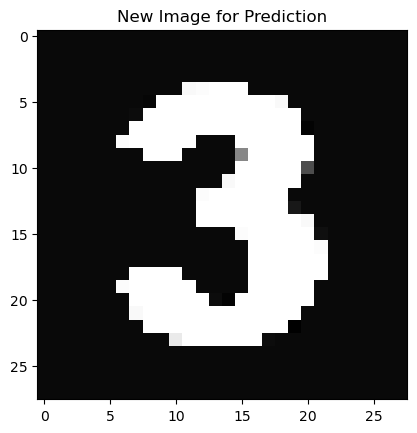

In [61]:
from tensorflow.keras.preprocessing import image

# Load an external image
img_path = r"C:\Users\vikra\3.jpg"  # Change this to your image path
img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))

# Convert the image to a NumPy array and normalize
img_array = image.img_to_array(img) / 255.0  
img_array = img_array.reshape(1, 28, 28)  # Reshape for model input
print(img_array)
# Display the image
plt.imshow(img_array[0], cmap="gray")
plt.title("New Image for Prediction")
plt.show()

In [57]:
import numpy as np
# Predict the digit
predictions = model.predict(img_array)
print(predictions)
# Print probabilities for each digit
for i, prob in enumerate(predictions[0]):
    print(f"Digit {i}: {prob:.5f}")
predicted_label = np.argmax(predictions)  # Get the class with highest probability

print(f"Predicted index: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
[[1.07659465e-12 1.31566544e-14 2.27460568e-03 9.97668564e-01
  1.48860271e-25 5.69069962e-05 9.74518422e-09 4.20849966e-10
  5.39862155e-09 1.27600973e-13]]
Digit 0: 0.00000
Digit 1: 0.00000
Digit 2: 0.00227
Digit 3: 0.99767
Digit 4: 0.00000
Digit 5: 0.00006
Digit 6: 0.00000
Digit 7: 0.00000
Digit 8: 0.00000
Digit 9: 0.00000
Predicted index: 3
